In [204]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [205]:
df = pd.read_csv("credit card complaints 3.csv", encoding='latin-1')


In [206]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
0,2013-07-29,Credit card,NaN,Billing statement,NaN,NaN,NaN,Citibank,OH,45247,NaN,NaN,Referral,2013-07-30,Closed with explanation,True,True,469026.0
1,2013-07-29,Credit card,NaN,APR or interest rate,NaN,NaN,NaN,Synchrony Financial,WA,98548,NaN,NaN,Web,2013-07-29,Closed with monetary relief,True,False,469131.0
2,2013-07-29,Credit card,NaN,Delinquent account,NaN,NaN,NaN,Amex,TX,78232,NaN,NaN,Web,2013-07-29,Closed with monetary relief,True,False,479990.0
3,2013-07-29,Credit card,NaN,Billing disputes,NaN,NaN,NaN,Capital One,FL,32226,Servicemember,NaN,Web,2013-07-29,Closed with explanation,True,False,475777.0
4,2013-07-29,Credit card,NaN,Credit line increase/decrease,NaN,NaN,NaN,Citibank,WI,53066,Older American,NaN,Phone,2013-07-30,Closed with explanation,True,True,469473.0


In [207]:
df.dtypes

date_received                    object
product                          object
sub_product                      object
issue                            object
sub_issue                        object
consumer_complaint_narrative     object
company_public_response          object
company                          object
state                            object
zip_code                         object
tags                             object
consumer_consent_provided        object
submitted_via                    object
date_sent_to_company             object
company_response_to_consumer     object
timely_response                  object
consumer_disputed                object
complaint_id                    float64
dtype: object

In [208]:
from datetime import datetime

In [209]:
df['date_received'] = pd.to_datetime(df['date_received'], errors='coerce')

In [210]:
df['date_sent_to_company'] = pd.to_datetime(df['date_sent_to_company'])

In [211]:
df.dtypes

date_received                   datetime64[ns]
product                                 object
sub_product                             object
issue                                   object
sub_issue                               object
consumer_complaint_narrative            object
company_public_response                 object
company                                 object
state                                   object
zip_code                                object
tags                                    object
consumer_consent_provided               object
submitted_via                           object
date_sent_to_company            datetime64[ns]
company_response_to_consumer            object
timely_response                         object
consumer_disputed                       object
complaint_id                           float64
dtype: object

In [212]:
df['date_received'].value_counts()

2012-06-19    260
2012-06-20    142
2011-12-05    141
2012-05-15    134
2016-09-09    120
             ... 
2017-04-10      2
2017-04-01      2
2014-07-13      1
2017-04-09      1
2017-04-07      1
Name: date_received, Length: 1956, dtype: int64

In [213]:

df.isna().sum()

date_received                       1
product                             0
sub_product                     87718
issue                               0
sub_issue                       87718
consumer_complaint_narrative    70285
company_public_response         67762
company                             0
state                             739
zip_code                          739
tags                            74461
consumer_consent_provided       58156
submitted_via                       2
date_sent_to_company                1
company_response_to_consumer        1
timely_response                     1
consumer_disputed                3811
complaint_id                        1
dtype: int64

In [214]:
df.shape

(87719, 18)

In [215]:
df['consumer_consent_provided'].value_counts()

Consent provided        17433
Consent not provided    11626
Other                     503
Consent withdrawn           1
Name: consumer_consent_provided, dtype: int64

In [216]:
df['company_public_response'].value_counts()

Company has responded to the consumer and the CFPB and chooses not to provide a public response                                              12475
Company chooses not to provide a public response                                                                                              6373
Company believes it acted appropriately as authorized by contract or law                                                                       852
Company believes complaint is the result of an isolated error                                                                                  126
Company believes complaint represents an opportunity for improvement to better serve consumers                                                  44
Company believes the complaint is the result of a misunderstanding                                                                              32
Company can't verify or dispute the facts in the complaint                                                            

In [217]:
df.drop(['sub_product','sub_issue'], axis = 1, inplace = True)

In [218]:
df.shape

(87719, 16)

In [219]:
df.drop(['consumer_complaint_narrative','company_public_response'], axis = 1, inplace = True)

In [221]:
df['company'].value_counts()

Citibank                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   16561
Capital One                                                                                                                                                                                                                                                                                                                                                                                                                            

In [223]:
df['company'].value_counts()

Citibank                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   16561
Capital One                                                                                                                                                                                                                                                                                                                                                                                                                            

In [224]:
df['company']

0                                                 Citibank
1                                      Synchrony Financial
2                                                     Amex
3                                              Capital One
4                                                 Citibank
                               ...                        
87714                                             Citibank
87715                          Alliance Data Card Services
87716                                         Barclays PLC
87717                                             Citibank
87718    öÍóCWÎ¾ ¯rýùæzqûõìvu¹ÿ-Y¸LsÔÂÿíÉÓ?{²¿½¿...
Name: company, Length: 87719, dtype: object

In [225]:
df.drop((87718),inplace = True)

In [226]:
df['company']

0                           Citibank
1                Synchrony Financial
2                               Amex
3                        Capital One
4                           Citibank
                    ...             
87713                           Amex
87714                       Citibank
87715    Alliance Data Card Services
87716                   Barclays PLC
87717                       Citibank
Name: company, Length: 87718, dtype: object

In [227]:
df.duplicated().sum()

0

In [228]:
df['complaint_id'] = df['complaint_id'].astype(str)

In [229]:
df.dtypes

date_received                   datetime64[ns]
product                                 object
issue                                   object
company                                 object
state                                   object
zip_code                                object
tags                                    object
consumer_consent_provided               object
submitted_via                           object
date_sent_to_company            datetime64[ns]
company_response_to_consumer            object
timely_response                         object
consumer_disputed                       object
complaint_id                            object
dtype: object

In [230]:
df['year'] = pd.DatetimeIndex(df['date_received']).year

In [231]:
df.head()

,date_received,product,issue,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,year
0,2013-07-29,Credit card,Billing statement,Citibank,OH,45247,NaN,NaN,Referral,2013-07-30,Closed with explanation,True,True,469026.0,2013
1,2013-07-29,Credit card,APR or interest rate,Synchrony Financial,WA,98548,NaN,NaN,Web,2013-07-29,Closed with monetary relief,True,False,469131.0,2013
2,2013-07-29,Credit card,Delinquent account,Amex,TX,78232,NaN,NaN,Web,2013-07-29,Closed with monetary relief,True,False,479990.0,2013
3,2013-07-29,Credit card,Billing disputes,Capital One,FL,32226,Servicemember,NaN,Web,2013-07-29,Closed with explanation,True,False,475777.0,2013
4,2013-07-29,Credit card,Credit line increase/decrease,Citibank,WI,53066,Older American,NaN,Phone,2013-07-30,Closed with explanation,True,True,469473.0,2013


# Finding out the total complaints yearwise

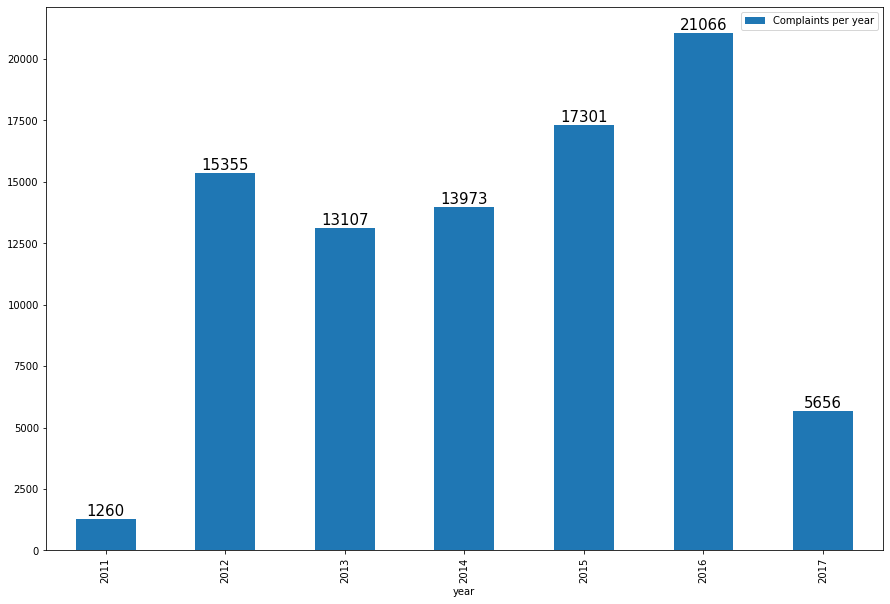

In [232]:
plots = df.groupby(['year'])['complaint_id'].count().plot(kind = 'bar' , label = 'Complaints per year', figsize=(15, 10))
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plt.legend()

In [233]:
len(df['company'].unique())

421

In [234]:
df['company'].unique()

array(['Citibank', 'Synchrony Financial', 'Amex', 'Capital One',
       'Wells Fargo & Company', 'JPMorgan Chase & Co.', 'Bank of America',
       'Barclays PLC', 'Discover', 'First National Bank of Omaha',
       'Fifth Third Financial Corporation', 'TD Bank US Holding Company',
       'HSBC North America Holdings Inc.', 'U.S. Bancorp',
       'PNC Bank N.A.', 'Army and Air Force Exchange Service',
       'USAA Savings', 'Quicken Loans', 'SunTrust Banks, Inc.',
       'Comerica', 'Portfolio Recovery Associates, Inc.',
       'Regions Financial Corporation', 'Citizens Financial Group, Inc.',
       'Global Client Solutions', 'Navy FCU', 'BBVA Compass',
       'Santander Bank US', 'TCF National Bank',
       'The Western Union Company', 'Pentagon FCU',
       'Liberty Holdings, LLC', 'State Farm Bank',
       'PayPal Holdings, Inc.', 'Synovus Bank', 'Gryphon Corp',
       'FirstBank', 'Encore Capital Group', 'National Check Bureau, Inc.',
       'Union Bank', 'Rabobank', 'FirstBank of P

In [235]:
len(pd.unique(df['company']))

421

## Top 10companies with most number of complaints

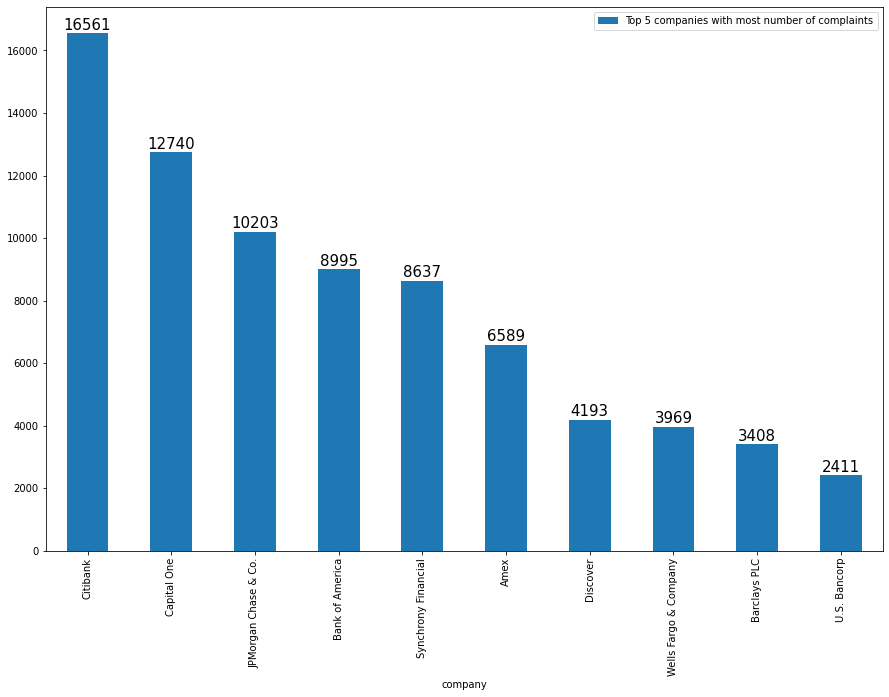

In [236]:
plots = df.groupby(['company'])['complaint_id'].count().nlargest(10).plot(kind = 'bar' , 
                        label = 'Top 5 companies with most number of complaints', figsize=(15, 10))
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plt.legend()

In [237]:
df['submitted_via'].value_counts()

Web            60384
Referral       14565
Phone           6587
Postal mail     5257
Fax              881
Email             43
Name: submitted_via, dtype: int64

## Count plot showing how many complaints are submitted through different options

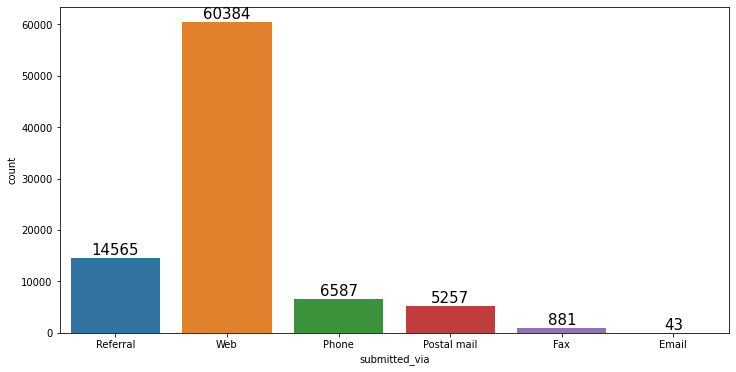

In [238]:
plt.figure(figsize=(12,6))
plots = sns.countplot(x = 'submitted_via' , data = df)
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    


In [239]:
df['issue'].value_counts()

Billing disputes                            14827
Other                                        9144
Identity theft / Fraud / Embezzlement        8330
Closing/Cancelling account                   6291
APR or interest rate                         5463
Late fee                                     3576
Customer service / Customer relations        3458
Delinquent account                           3155
Credit determination                         3013
Advertising and marketing                    2894
Rewards                                      2866
Credit card protection / Debt protection     2689
Transaction issue                            2654
Billing statement                            2590
Payoff process                               2277
Credit line increase/decrease                2146
Other fee                                    2141
Unsolicited issuance of credit card          1815
Credit reporting                             1696
Balance transfer                             1104


In [240]:
len(df['issue'].value_counts())

33

[Text(0, 0, 'Billing statement'),
 Text(1, 0, 'APR or interest rate'),
 Text(2, 0, 'Delinquent account'),
 Text(3, 0, 'Billing disputes'),
 Text(4, 0, 'Credit line increase/decrease'),
 Text(5, 0, 'Payoff process'),
 Text(6, 0, 'Closing/Cancelling account'),
 Text(7, 0, 'Credit determination'),
 Text(8, 0, 'Identity theft / Fraud / Embezzlement'),
 Text(9, 0, 'Transaction issue'),
 Text(10, 0, 'Balance transfer fee'),
 Text(11, 0, 'Late fee'),
 Text(12, 0, 'Advertising and marketing'),
 Text(13, 0, 'Credit card protection / Debt protection'),
 Text(14, 0, 'Application processing delay'),
 Text(15, 0, 'Other'),
 Text(16, 0, 'Customer service / Customer relations'),
 Text(17, 0, 'Cash advance'),
 Text(18, 0, 'Unsolicited issuance of credit card'),
 Text(19, 0, 'Privacy'),
 Text(20, 0, 'Bankruptcy'),
 Text(21, 0, 'Convenience checks'),
 Text(22, 0, 'Other fee'),
 Text(23, 0, 'Balance transfer'),
 Text(24, 0, 'Overlimit fee'),
 Text(25, 0, 'Forbearance / Workout plans'),
 Text(26, 0, 'Rewa

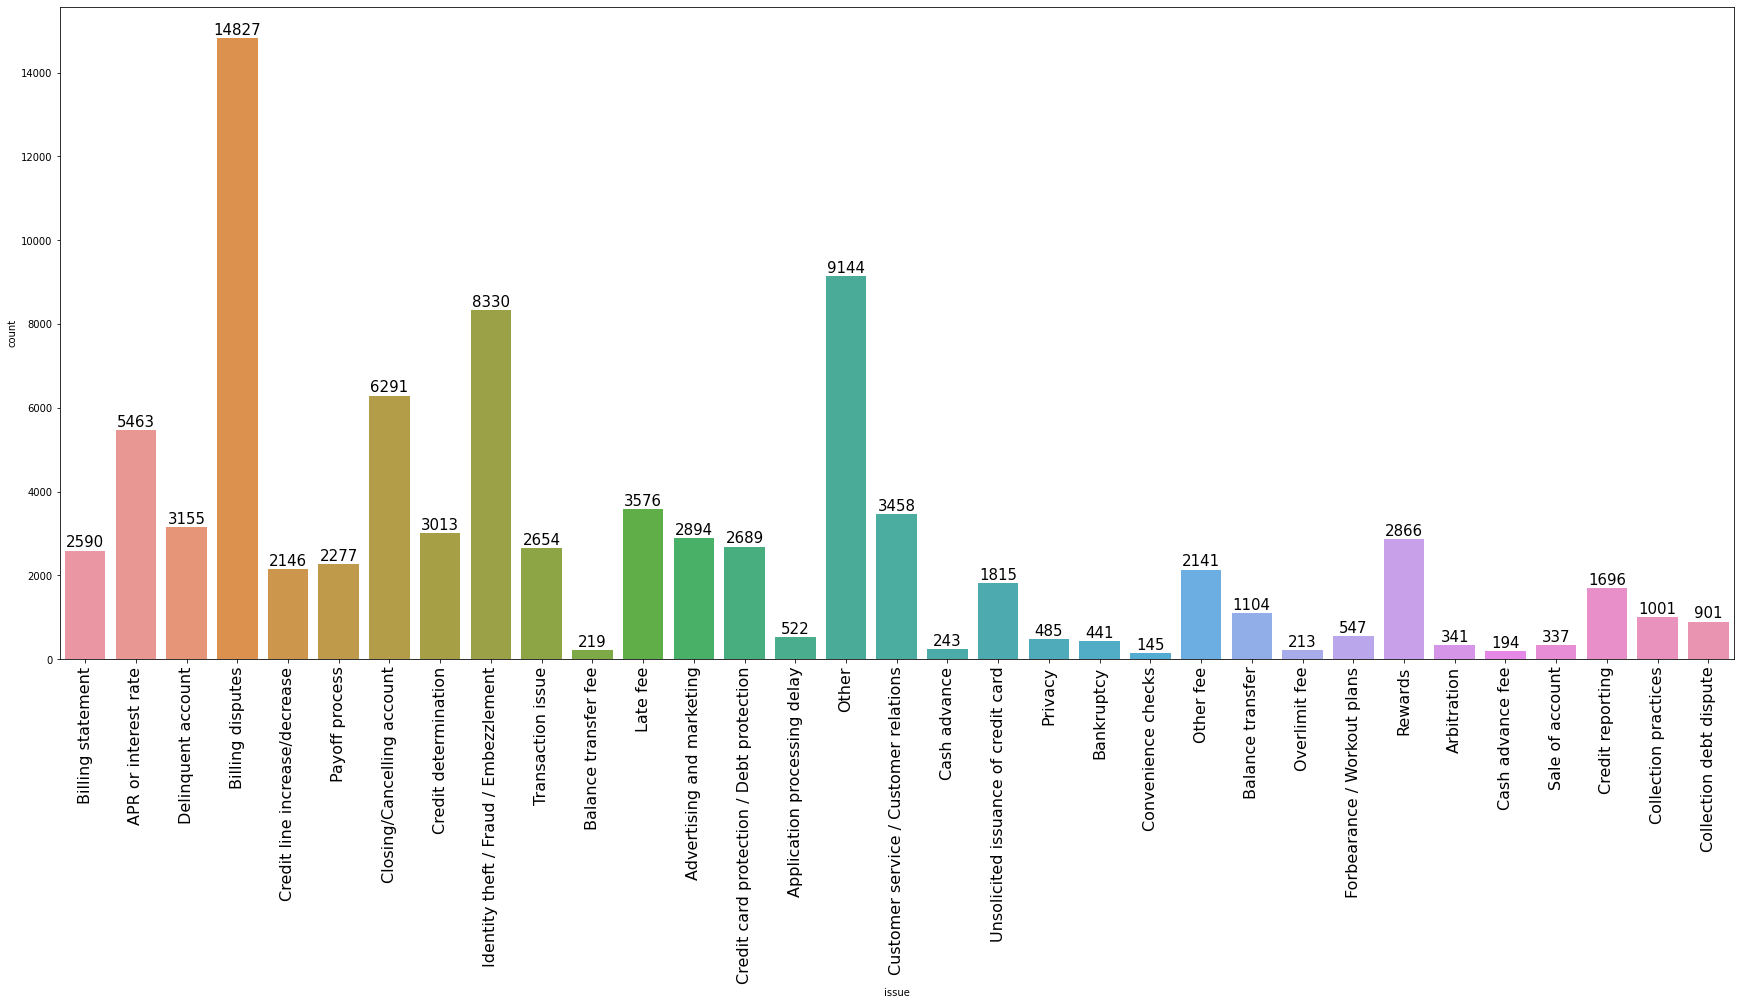

In [241]:
plt.figure(figsize=(30,12))
plots = sns.countplot(x = 'issue' , data = df)
for bar in plots.patches:
                   plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
        
plots.set_xticklabels(plots.get_xticklabels(), rotation=90, fontsize = 16)

    
    
   

    
   

## From the below pie chart we can observe that 60% of the complaints are closed with an            explanation


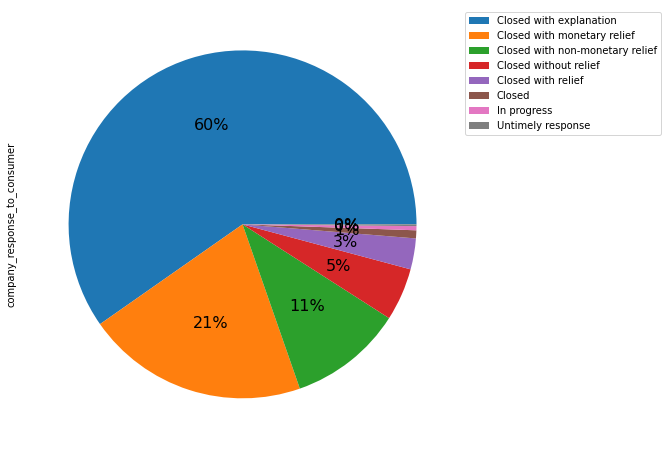

In [243]:
plots = df['company_response_to_consumer' ].value_counts(normalize=True ).plot(
    kind='pie', y='company_response_to_consumer', autopct='%1.0f%%' , figsize = (30,8) ,  fontsize = 16 , labeldistance = None)  
plots.legend(loc = 'best' , bbox_to_anchor=(1,1))

In [244]:
df['timely_response'].value_counts()

True     86750
False      968
Name: timely_response, dtype: int64

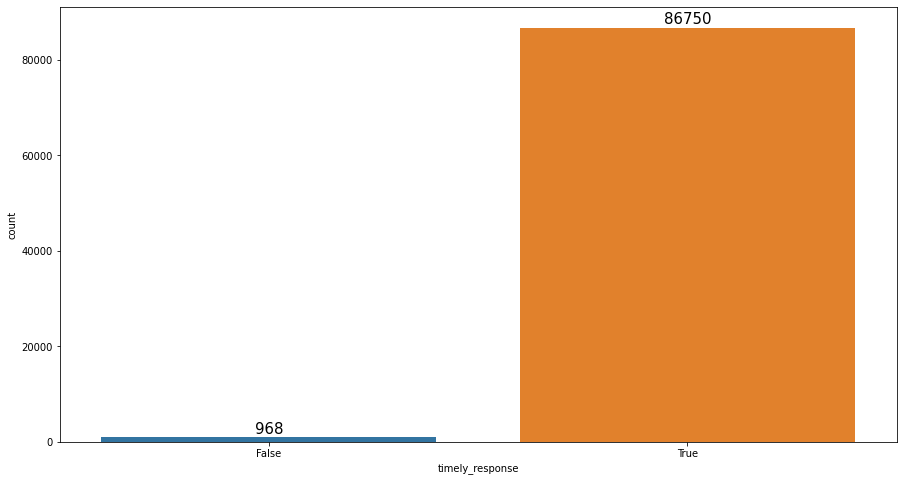

In [248]:
plt.figure(figsize=(15,8))
plots = sns.countplot(x = 'timely_response' , data = df )
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
